In [1]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

In [2]:
def detect(frame):
    height, width, depth = frame.shape

    # create grayscale version
    grayscale = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    # equalize histogram
    cv2.equalizeHist(grayscale, grayscale)

    # detect objects
    classifier = cv2.CascadeClassifier("/usr/local/share/OpenCV/haarcascades/haarcascade_frontalface_alt.xml")
    DOWNSCALE = 4
    minisize = (frame.shape[1]/DOWNSCALE,frame.shape[0]/DOWNSCALE)
    miniframe = cv2.resize(frame, minisize)
    faces = classifier.detectMultiScale(miniframe)
    if len(faces)>0:
        # print 'face detected!'
        for i in faces:
            x, y, w, h = [ v*DOWNSCALE for v in i ]
            cv2.rectangle(frame, (x,y), (x+w,y+h), (0,255,0))
    return frame

In [3]:
cap = cv2.VideoCapture(0)

if (cap==True):
    print("deu certo")
while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    img = frame.copy()
    # Call the function
    frame = detect(frame)

    # Display the resulting frame
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()
cap = cv2

(-0.5, 639.5, 479.5, -0.5)

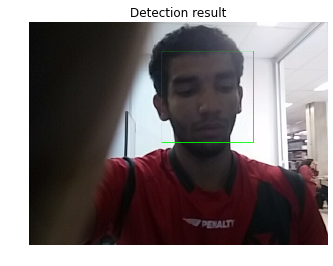

In [4]:
plt.imshow(frame[:,:,::-1])
plt.title('Detection result')
plt.axis('off')

(-0.5, 639.5, 479.5, -0.5)

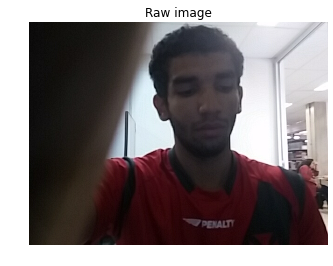

In [5]:
img = img[:,:,::-1] # Converting from BGR (OpenCV) to RGB (standard)
plt.imshow(img)
plt.title('Raw image')
plt.axis('off')

In [6]:
img.mean()

82.160618489583328

In [7]:
img.std()

83.516598134385731

In [8]:
hist = np.histogram(img)
for l in hist: 
    print l

[299780 216862 115447  37332  13512  11966  21131  33871  82491  89208]
[   0.    25.5   51.    76.5  102.   127.5  153.   178.5  204.   229.5
  255. ]


<Container object of 10 artists>

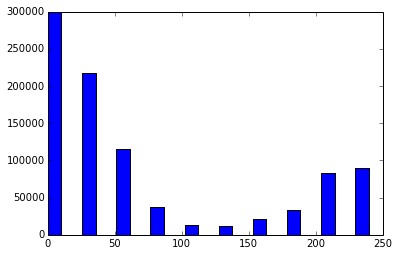

In [9]:
plt.bar(hist[1][:-1], hist[0], 10) # counts, x-axis

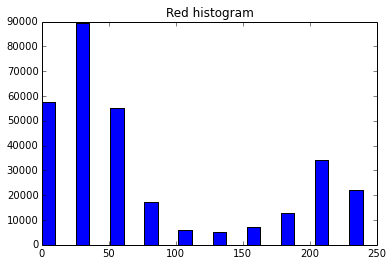

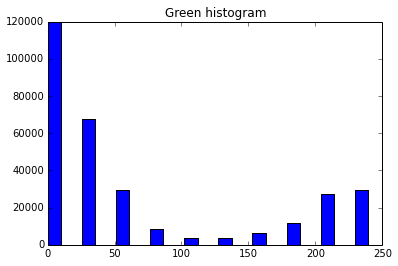

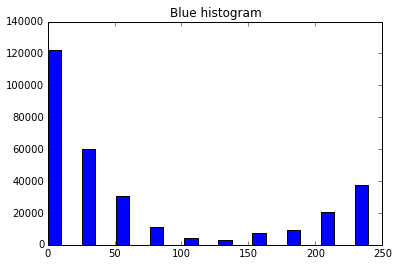

In [10]:
hist_red  = np.histogram(img[:,:,0], hist[1]) # using the same x-axis as the general histogram (hist[1])
hist_green  = np.histogram(img[:,:,1], hist[1])
hist_blue  = np.histogram(img[:,:,2], hist[1])

plt.figure()
plt.bar(hist[1][:-1], hist_red[0], 10)
plt.title('Red histogram')
plt.figure()
plt.bar(hist[1][:-1], hist_green[0], 10)
plt.title('Green histogram')
plt.figure()
plt.bar(hist[1][:-1], hist_blue[0], 10)
plt.title('Blue histogram')

In [11]:
np.hstack((hist_red[0],hist_blue[0],hist_green[0]))

array([ 57691,  89564,  55223,  17306,   6111,   5145,   7043,  12688,
        34184,  22245, 122303,  59797,  30810,  11325,   4000,   3322,
         7518,   9536,  20847,  37742, 119786,  67501,  29414,   8701,
         3401,   3499,   6570,  11647,  27460,  29221])

In [12]:
640*480*3

921600

In [13]:
hist_red

(array([57691, 89564, 55223, 17306,  6111,  5145,  7043, 12688, 34184, 22245]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]))

In [14]:
hist

(array([299780, 216862, 115447,  37332,  13512,  11966,  21131,  33871,
         82491,  89208]),
 array([   0. ,   25.5,   51. ,   76.5,  102. ,  127.5,  153. ,  178.5,
         204. ,  229.5,  255. ]))